# **DNN BASE MODEL**

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.5476 - loss: 0.7015 - val_accuracy: 0.8333 - val_loss: 0.6777
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8752 - loss: 0.6709 - val_accuracy: 0.8333 - val_loss: 0.6621
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9307 - loss: 0.6440 - val_accuracy: 0.8333 - val_loss: 0.6445
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9359 - loss: 0.6164 - val_accuracy: 0.8333 - val_loss: 0.6237
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9359 - loss: 0.5899 - val_accuracy: 0.8333 - val_loss: 0.5986
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9472 - loss: 0.5486 - val_accuracy: 0.8333 - val_loss: 0.5687
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9367 - loss: 0.5103 - val_accuracy: 0.8750 - val_loss: 0.5338
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9489 - loss: 0.4693 - val_accuracy: 0.8750 - val_loss: 0.4943
Epoch 9/15

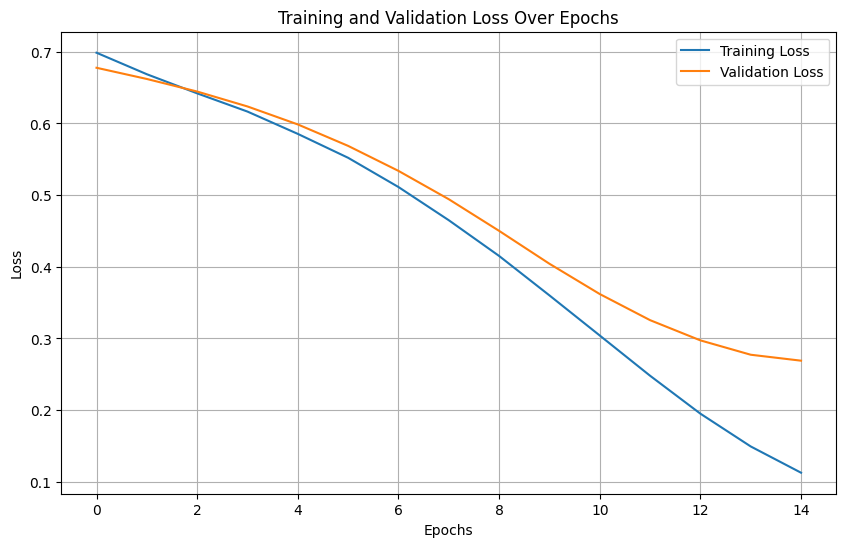

Base Model Summary:


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,037 (203.27 KB)

 Trainable params: 17,345 (67.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,692 (135.52 KB)

In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

merged_df_simplified = pd.read_csv('data_merged.csv')

#  Prepare the data
X = merged_df_simplified.drop(columns=['htn', 'sg', 'pc', 'dm', 'rbcc', 'bu', 'sod', 'pe', 'appet', 'rbc', 'class'])
y = merged_df_simplified['class']

# Train (70%), validation (15%), and test(15%) split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=101, stratify=y_temp
)

## Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define base model
base_model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with validation
history = base_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64
)

## Make predictions and calculate accuracy
y_pred_train = (base_model.predict(X_train) > 0.5).astype(int) # Convert predictions to 0/1
y_pred_val = (base_model.predict(X_val) > 0.5).astype(int)
y_pred_test = (base_model.predict(X_test) > 0.5).astype(int)

train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
val_acc = accuracy_score(y_true=y_val, y_pred=y_pred_val)
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)

print("Train Accuracy: {:.3f}".format(train_acc))
print("Validation Accuracy: {:.3f}".format(val_acc))
print("Test Accuracy: {:.3f}".format(test_acc))

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Print the number of parameters in the base model
print("Base Model Summary:")
base_model.summary()

In [23]:
from sklearn.metrics import classification_report

# For the training set
train_report = classification_report(y_train, y_pred_train)
print("Classification Report (Train):\n", train_report)

# For the validation set
val_report = classification_report(y_val, y_pred_val)
print("Classification Report (Validation):\n", val_report)

# For the test set
test_report = classification_report(y_test, y_pred_test)
print("Classification Report (Test):\n", test_report)

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.98      1.00      0.99        80

    accuracy                           0.98       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.98      0.98      0.98       110

Classification Report (Validation):
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.89      1.00      0.94        17

    accuracy                           0.92        24
   macro avg       0.95      0.86      0.89        24
weighted avg       0.93      0.92      0.91        24

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        18

    accuracy                           1.00        24
   macro avg       1.00     

In [24]:
from sklearn.metrics import confusion_matrix

# For the training set
train_conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Train):\n", train_conf_matrix)

# For the validation set
val_conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix (Validation):\n", val_conf_matrix)

# For the test set
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test):\n", test_conf_matrix)

Confusion Matrix (Train):
 [[28  2]
 [ 0 80]]
Confusion Matrix (Validation):
 [[ 5  2]
 [ 0 17]]
Confusion Matrix (Test):
 [[ 6  0]
 [ 0 18]]


In [25]:
y_pred_test = (models["Base Model"].predict(X_test) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


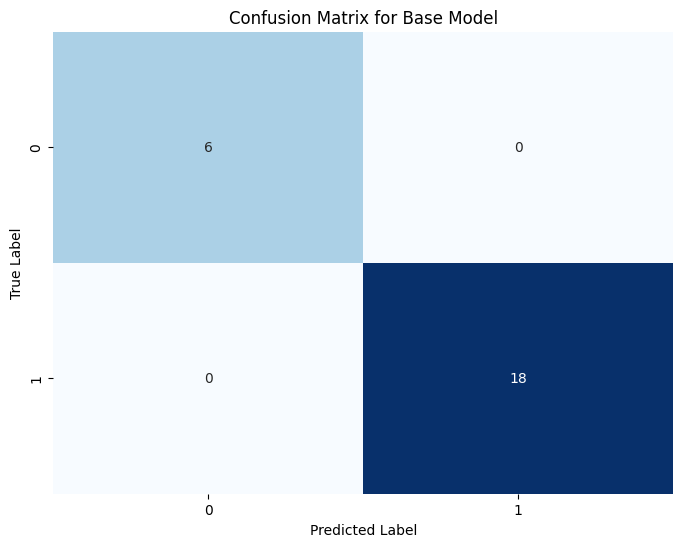

In [28]:
!pip install seaborn
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False) # Now sns is defined and can be used
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Base Model')
plt.show()

# **DNN Hyperparameter Tuning**


#   First Hyperparameter Tuning with the Original Hyper.py code

1. Number of Layers:

*  I drop two layers to force the network with smaller nerual so it will not overfit

2.Number of Hidden Units per Layer:

*   I change change three unit from 0.1 to 0.5 to observe will  the weight affect the L2 Regulations and help prevent overfiting


3.Learning Rate:


4.Activation Functions:
* He initialization for ReLU  help prevent vanishing and keep  gradients flow









In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l2
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare the data
X = merged_df_simplified.drop(columns=['htn', 'sg', 'pc', 'dm', 'rbcc', 'bu', 'sod', 'pe', 'appet', 'rbc', 'class'])
y = merged_df_simplified['class']

# Train (70%), validation (15%), and test(15%) split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=101, stratify=y_temp
)

## Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to train a model and return the history
def train_model(base_model, name, X_train, y_train, X_val, y_val, epochs=15, batch_size=64):
    print(f"Training {name}...")
    history = base_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    return history

# Function to evaluate a model and display accuracy
def evaluate_model(base_model, name, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train) > 0.5
    y_pred_test = model.predict(X_test) > 0.5
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(f"{name} - Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}\n")

# Function to plot training and validation loss
def plot_loss(history, base_model):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to display model summary
def display_model_summary(model, name):
    print(f"{name} - Model Summary:")
    model.summary()

# Define models
models = {
    "Base Model": Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units=64, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]),
    "L2 Regularization Model": Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
        Dense(units=64, activation='relu', kernel_regularizer=l2(0.5)),
        Dense(units=64, activation='relu', kernel_regularizer=l2(0.5)),
        Dense(units=64, activation='relu', kernel_regularizer=l2(0.5)),
        Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=1, activation='sigmoid')
    ]),
    "Dropout Model": Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')
    ]),
}

# Compile models
for name, model in models.items():
    if name == "L2 Regularization Model":
        model.compile(loss='binary_crossentropy', optimizer='adam')
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam')

# Train, evaluate, and display summary for each model
for name, model in models.items():
    history = train_model(model, name, X_train, y_train, X_val, y_val)
    plot_loss(history, name)
    evaluate_model(model, name, X_train, y_train, X_test, y_test)
    display_model_summary(model, name)





**2nd Hyperparameters

Training Base Model...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.5606 - loss: 0.7021 - val_accuracy: 0.7917 - val_loss: 0.6460
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8311 - loss: 0.6424 - val_accuracy: 0.7917 - val_loss: 0.6153
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8900 - loss: 0.6013 - val_accuracy: 0.7917 - val_loss: 0.5879
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8856 - loss: 0.5663 - val_accuracy: 0.8333 - val_loss: 0.5627
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9021 - loss: 0.5266 - val_accuracy: 0.8333 - val_loss: 0.5384
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8865 - loss: 0.4909 - val_accuracy: 0.8333 - val_loss: 0.5142
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9081 - loss: 0.4512 - val_accuracy: 0.8333 - val_loss: 0.4907
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9142 - loss: 0.4221 - val_accuracy: 0.8333 - val_loss: 0.4684
Epoch 9/15

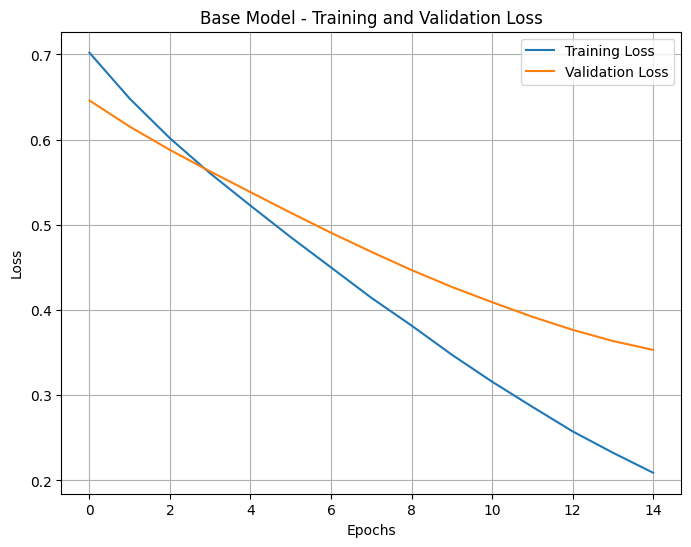

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Base Model - Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        30
           1       0.93      1.00      0.96        80

    accuracy                           0.95       110
   macro avg       0.97      0.90      0.93       110
weighted avg       0.95      0.95      0.94       110

Base Model - Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.81      1.00      0.89        17

    accuracy                           0.83        24
   macro avg       0.90      0.71      0.75        24
weighted avg       0.87      0.83      0.81        24

Base Model - Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,077 (105.77 KB)

 Trainable params: 9,025 (35.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,052 (70.52 KB)

Training L2 Regularization Model...
Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.7192 - loss: 2.1106 - val_accuracy: 0.7083 - val_loss: 2.0637
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7478 - loss: 2.0401 - val_accuracy: 0.7083 - val_loss: 2.0171
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8267 - loss: 1.9744 - val_accuracy: 0.7500 - val_loss: 1.9716
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8293 - loss: 1.9312 - val_accuracy: 0.7917 - val_loss: 1.9268
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8579 - loss: 1.8762 - val_accuracy: 0.7917 - val_loss: 1.8834
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9012 - loss: 1.8199 - val_accuracy: 0.7917 - val_loss: 1.8405
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9194 - loss: 1.7685 - val_accuracy: 0.7917 - val_loss: 1.7978
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9090 - loss: 1.7228 - val

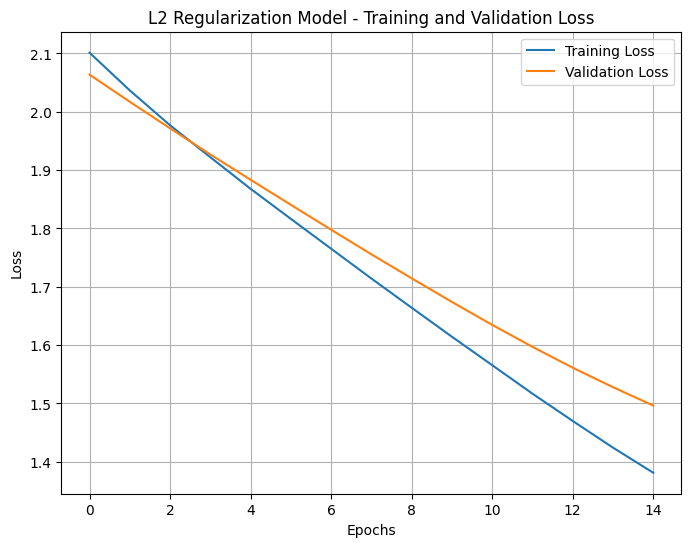

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
L2 Regularization Model - Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.94      1.00      0.97        80

    accuracy                           0.95       110
   macro avg       0.97      0.92      0.94       110
weighted avg       0.96      0.95      0.95       110

L2 Regularization Model - Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.77      1.00      0.87        17

    accuracy                           0.79        24
   macro avg       0.89      0.64      0.66        24
weighted avg       0.84      0.79      0.75        24

L2 Regularization Model - Classification Report (Test):
              precision    recall  f1-score   support

  

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,077 (105.77 KB)

 Trainable params: 9,025 (35.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,052 (70.52 KB)

Training Dropout Model...
Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.3397 - loss: 0.7469 - val_accuracy: 0.4583 - val_loss: 0.6718
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4766 - loss: 0.6985 - val_accuracy: 0.7083 - val_loss: 0.6552
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4766 - loss: 0.6916 - val_accuracy: 0.8750 - val_loss: 0.6409
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5754 - loss: 0.6789 - val_accuracy: 0.8750 - val_loss: 0.6281
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5728 - loss: 0.6383 - val_accuracy: 0.8750 - val_loss: 0.6167
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6768 - loss: 0.6290 - val_accuracy: 0.8750 - val_loss: 0.6062
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6516 - loss: 0.6326 - val_accuracy: 0.8750 - val_loss: 0.5953
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7175 - loss: 0.6010 - val_accuracy:

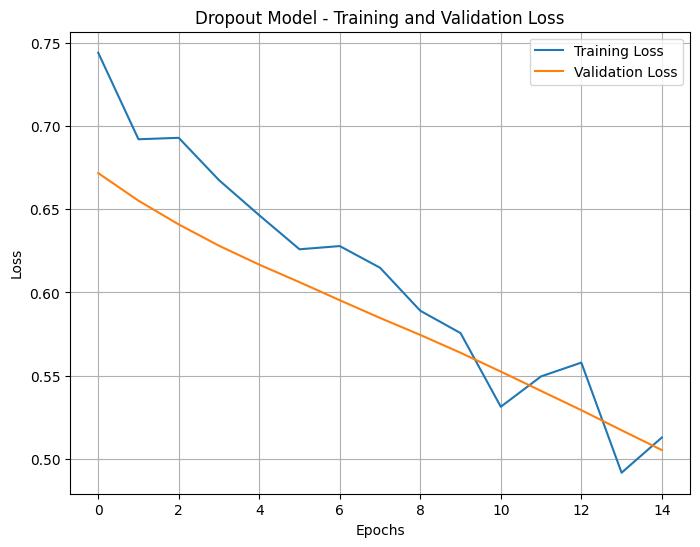

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Dropout Model - Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        30
           1       0.91      1.00      0.95        80

    accuracy                           0.93       110
   macro avg       0.95      0.87      0.90       110
weighted avg       0.93      0.93      0.92       110

Dropout Model - Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.77      1.00      0.87        17

    accuracy                           0.79        24
   macro avg       0.89      0.64      0.66        24
weighted avg       0.84      0.79      0.75        24

Dropout Model - Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.6

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,077 (105.77 KB)

 Trainable params: 9,025 (35.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,052 (70.52 KB)

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prepare the data
X = merged_df_simplified.drop(columns=['htn', 'sg', 'pc', 'dm', 'rbcc', 'bu', 'sod', 'pe', 'appet', 'rbc', 'class'])
y = merged_df_simplified['class']

# Train (70%), validation (15%), and test(15%) split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=101, stratify=y_temp
)

# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to train a model and return the history
def train_model(base_model, name, X_train, y_train, X_val, y_val, epochs=15, batch_size=64):
    print(f"Training {name}...")
    history = base_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    return history

# Function to evaluate a model with classification report and specificity
def evaluate_model(base_model, name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Predict probabilities and apply threshold for binary classification
    y_pred_train = (base_model.predict(X_train) > 0.5).astype(int)
    y_pred_val = (base_model.predict(X_val) > 0.5).astype(int)
    y_pred_test = (base_model.predict(X_test) > 0.5).astype(int)

    # Calculate accuracy for train, validation, and test sets
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    test_acc = accuracy_score(y_test, y_pred_test)

    # Print classification reports
    print(f"{name} - Classification Report (Train):\n{classification_report(y_train, y_pred_train)}")
    print(f"{name} - Classification Report (Validation):\n{classification_report(y_val, y_pred_val)}")
    print(f"{name} - Classification Report (Test):\n{classification_report(y_test, y_pred_test)}")

    # Compute specificity
    def compute_specificity(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

    train_specificity = compute_specificity(y_train, y_pred_train)
    val_specificity = compute_specificity(y_val, y_pred_val)
    test_specificity = compute_specificity(y_test, y_pred_test)

    print(f"{name} - Train Accuracy: {train_acc:.3f}, Specificity: {train_specificity:.3f}")
    print(f"{name} - Validation Accuracy: {val_acc:.3f}, Specificity: {val_specificity:.3f}")
    print(f"{name} - Test Accuracy: {test_acc:.3f}, Specificity: {test_specificity:.3f}")

# Function to plot training and validation loss
def plot_loss(history, name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to display model summary
def display_model_summary(model, name):
    print(f"{name} - Model Summary:")
    model.summary()

# Define models
models = {
    "Base Model": Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units=64, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]),
    "L2 Regularization Model": Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
        Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=1, activation='sigmoid')
    ]),
    "Dropout Model": Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')
    ]),
}

# Compile models
for name, model in models.items():
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train, evaluate, and display summary for each model
for name, model in models.items():
    history = train_model(model, name, X_train, y_train, X_val, y_val)
    plot_loss(history, name)
    evaluate_model(model, name, X_train, y_train, X_val, y_val, X_test, y_test)
    display_model_summary(model, name)
